<a href="https://colab.research.google.com/github/Andyqballer/HomeWork3/blob/main/HomeWork3Problem2%2C3%2C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cancer Classification: Problems 2 & 3
Setup and Data Loading

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
breast = load_breast_cancer()
X = breast.data
y = breast.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Problem 2: Logistic Regression Classification
This problem involves building two logistic regression models:

A baseline model using all 30 input features
A model with weight penalty (regularization)

##Both models will use an 80/20 train/test split and proper scaling/standardization.
Part 1: Baseline Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


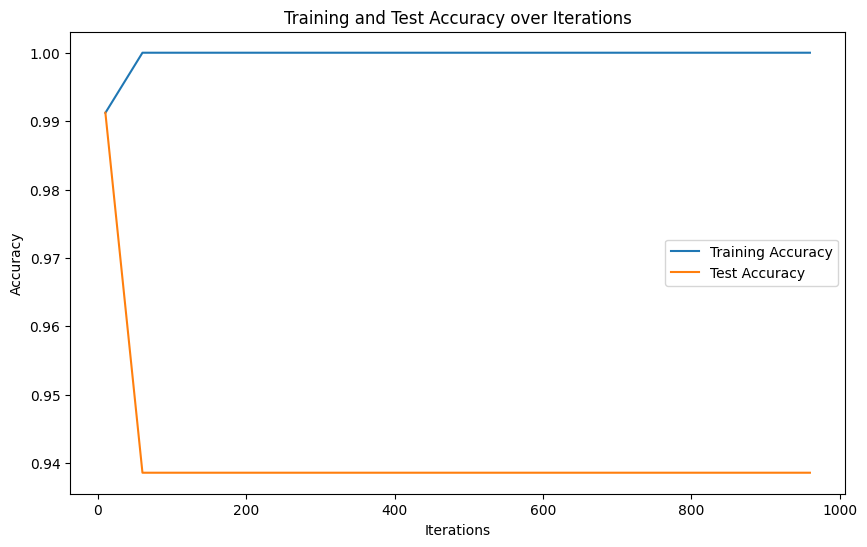

Results without regularization:
Accuracy: 0.9386
Precision: 0.9848
Recall: 0.9155
F1 Score: 0.9489


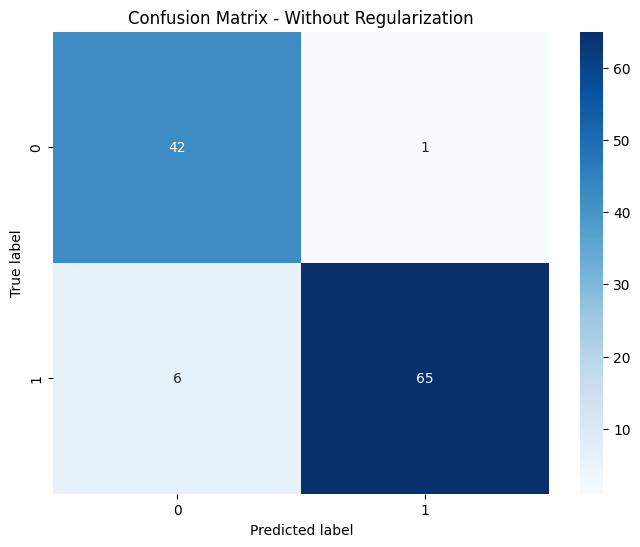

In [ ]:
# Initialize and train logistic regression model
model_no_reg = LogisticRegression(penalty=None, max_iter=1000, random_state=42)

# Fit the model and record training history
training_scores = []
test_scores = []
iterations = range(10, 1000, 50)

for i in iterations:
    temp_model = LogisticRegression(penalty=None, max_iter=i, random_state=42)
    temp_model.fit(X_train_scaled, y_train)
    training_scores.append(temp_model.score(X_train_scaled, y_train))
    test_scores.append(temp_model.score(X_test_scaled, y_test))

# Plot training results
plt.figure(figsize=(10, 6))
plt.plot(iterations, training_scores, label='Training Accuracy')
plt.plot(iterations, test_scores, label='Test Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy over Iterations')
plt.legend()
plt.show()

# Final training
model_no_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_no_reg = model_no_reg.predict(X_test_scaled)

# Calculate metrics
acc_no_reg = accuracy_score(y_test, y_pred_no_reg)
prec_no_reg = precision_score(y_test, y_pred_no_reg)
rec_no_reg = recall_score(y_test, y_pred_no_reg)
f1_no_reg = f1_score(y_test, y_pred_no_reg)

print("Results without regularization:")
print(f"Accuracy: {acc_no_reg:.4f}")
print(f"Precision: {prec_no_reg:.4f}")
print(f"Recall: {rec_no_reg:.4f}")
print(f"F1 Score: {f1_no_reg:.4f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm_no_reg = confusion_matrix(y_test, y_pred_no_reg)
sns.heatmap(cm_no_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Without Regularization')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#Part 2: Logistic Regression with Weight Penalty

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


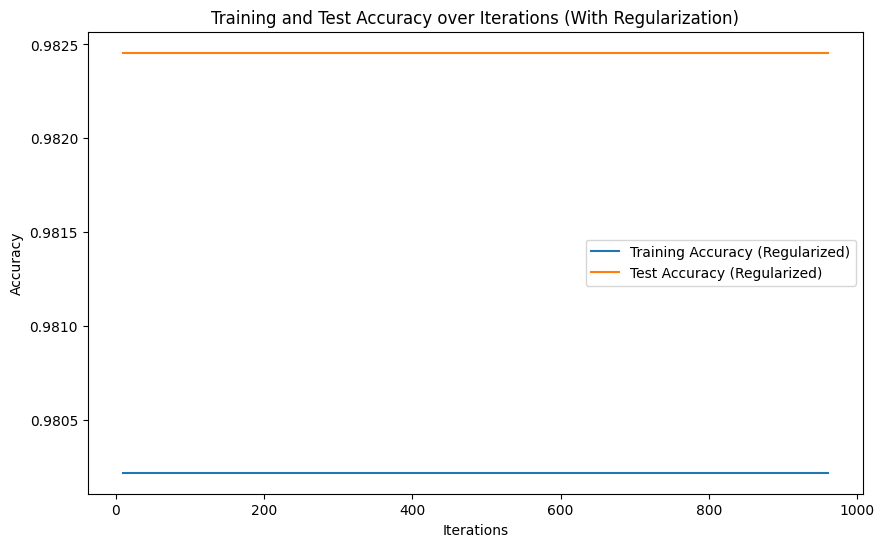


Results with regularization (C=0.1):
Accuracy: 0.9825
Precision: 0.9726
Recall: 1.0000
F1 Score: 0.9861


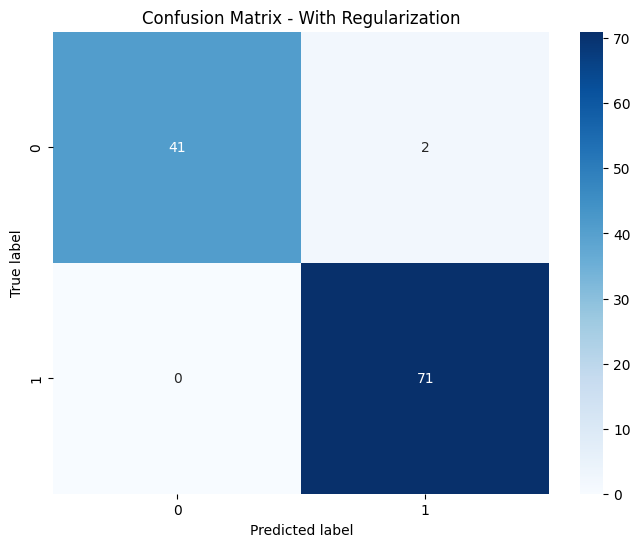

In [ ]:
# Train logistic regression model with regularization
C_value = 0.1  # Inverse of regularization strength
model_reg = LogisticRegression(C=C_value, max_iter=1000, random_state=42)

# Fit the model and record training history
training_scores_reg = []
test_scores_reg = []

for i in iterations:
    temp_model = LogisticRegression(C=C_value, max_iter=i, random_state=42)
    temp_model.fit(X_train_scaled, y_train)
    training_scores_reg.append(temp_model.score(X_train_scaled, y_train))
    test_scores_reg.append(temp_model.score(X_test_scaled, y_test))

# Plot training results
plt.figure(figsize=(10, 6))
plt.plot(iterations, training_scores_reg, label='Training Accuracy (Regularized)')
plt.plot(iterations, test_scores_reg, label='Test Accuracy (Regularized)')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy over Iterations (With Regularization)')
plt.legend()
plt.show()

# Final training
model_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_reg = model_reg.predict(X_test_scaled)

# Calculate metrics
acc_reg = accuracy_score(y_test, y_pred_reg)
prec_reg = precision_score(y_test, y_pred_reg)
rec_reg = recall_score(y_test, y_pred_reg)
f1_reg = f1_score(y_test, y_pred_reg)

print("\nResults with regularization (C=0.1):")
print(f"Accuracy: {acc_reg:.4f}")
print(f"Precision: {prec_reg:.4f}")
print(f"Recall: {rec_reg:.4f}")
print(f"F1 Score: {f1_reg:.4f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm_reg = confusion_matrix(y_test, y_pred_reg)
sns.heatmap(cm_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - With Regularization')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#Problem 3: Naive Bayes Classification
##This problem involves building a Naive Bayes model and comparing it with the logistic regression models from Problem 2.

Training Naive Bayes model...

Naive Bayes Model Results:
Accuracy: 0.9649
Precision: 0.9589
Recall: 0.9859
F1 Score: 0.9722


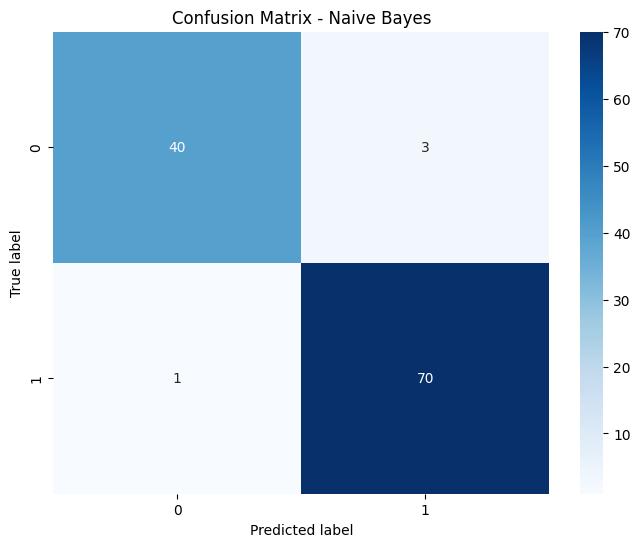

In [ ]:
# Train Naive Bayes model
print("Training Naive Bayes model...")
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test_scaled)

# Calculate metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print("\nNaive Bayes Model Results:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1 Score: {f1_nb:.4f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#Comparison of All Models For Problem 2 And 3


Model Comparison Summary:
           Logistic Regression  Logistic Regression (Regularized)  Naive Bayes
Metric                                                                        
Accuracy              0.938596                           0.982456     0.964912
Precision             0.984848                           0.972603     0.958904
Recall                0.915493                           1.000000     0.985915
F1 Score              0.948905                           0.986111     0.972222


<Figure size 1200x600 with 0 Axes>

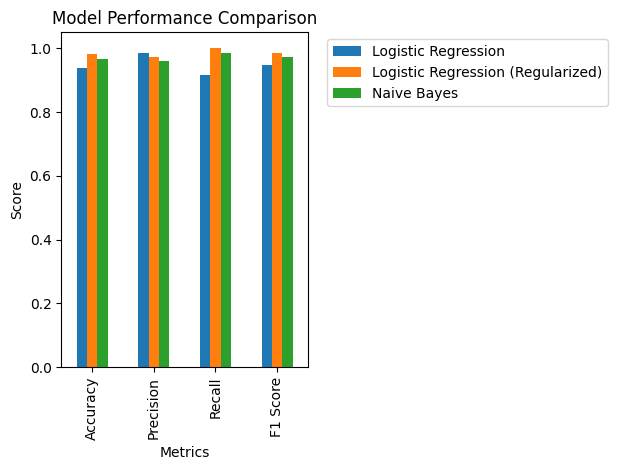

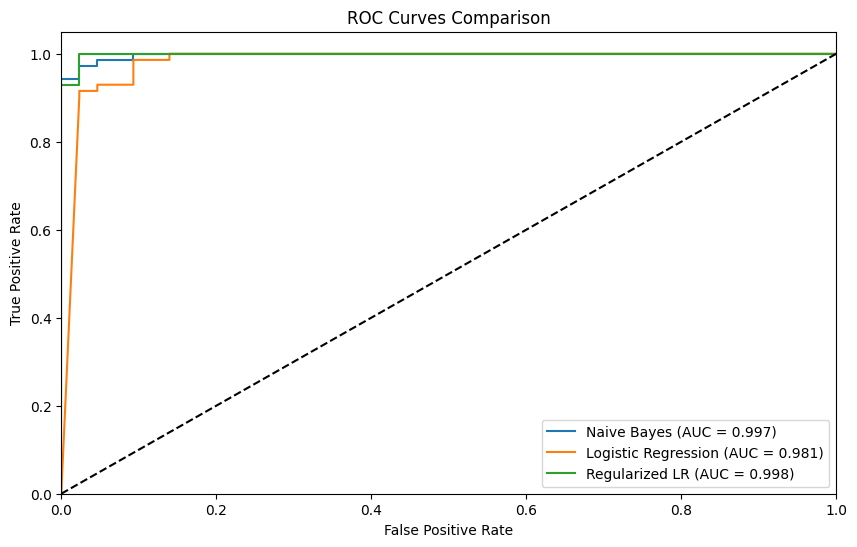

In [ ]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression': [acc_no_reg, prec_no_reg, rec_no_reg, f1_no_reg],
    'Logistic Regression (Regularized)': [acc_reg, prec_reg, rec_reg, f1_reg],
    'Naive Bayes': [accuracy_nb, precision_nb, recall_nb, f1_nb]
})
comparison_df = comparison_df.set_index('Metric')

print("\nModel Comparison Summary:")
print(comparison_df)

# Plotting comparison
plt.figure(figsize=(12, 6))
comparison_df.plot(kind='bar')
plt.title('Model Performance Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot ROC curves
plt.figure(figsize=(10, 6))
# ROC for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_model.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc(fpr_nb, tpr_nb):.3f})')

# ROC for Regular Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, model_no_reg.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc(fpr_lr, tpr_lr):.3f})')

# ROC for Regularized Logistic Regression
fpr_lr_reg, tpr_lr_reg, _ = roc_curve(y_test, model_reg.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr_lr_reg, tpr_lr_reg, label=f'Regularized LR (AUC = {auc(fpr_lr_reg, tpr_lr_reg):.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.show()

#Problem 4: Logistic Regression with PCA Feature Extraction
This problem involves using PCA for dimensionality reduction before applying logistic regression. We'll:

Iterate through different numbers of principal components
Find the optimal number of components for highest accuracy
Plot metrics for different numbers of components
Compare results with Problems 2 and 3

Training models with different numbers of principal components...
K=1: Accuracy=0.9474
K=2: Accuracy=0.9912
K=3: Accuracy=0.9825
K=4: Accuracy=0.9737
K=5: Accuracy=0.9825
K=6: Accuracy=0.9825
K=7: Accuracy=0.9825
K=8: Accuracy=0.9912
K=9: Accuracy=0.9825
K=10: Accuracy=0.9825
K=11: Accuracy=0.9912
K=12: Accuracy=0.9912
K=13: Accuracy=0.9825
K=14: Accuracy=0.9912
K=15: Accuracy=0.9912
K=16: Accuracy=0.9912
K=17: Accuracy=0.9825
K=18: Accuracy=0.9825
K=19: Accuracy=0.9737
K=20: Accuracy=0.9737
K=21: Accuracy=0.9737
K=22: Accuracy=0.9825
K=23: Accuracy=0.9737
K=24: Accuracy=0.9737
K=25: Accuracy=0.9737
K=26: Accuracy=0.9737
K=27: Accuracy=0.9737
K=28: Accuracy=0.9737
K=29: Accuracy=0.9737
K=30: Accuracy=0.9737

Optimal number of components: 2
Best accuracy: 0.9912


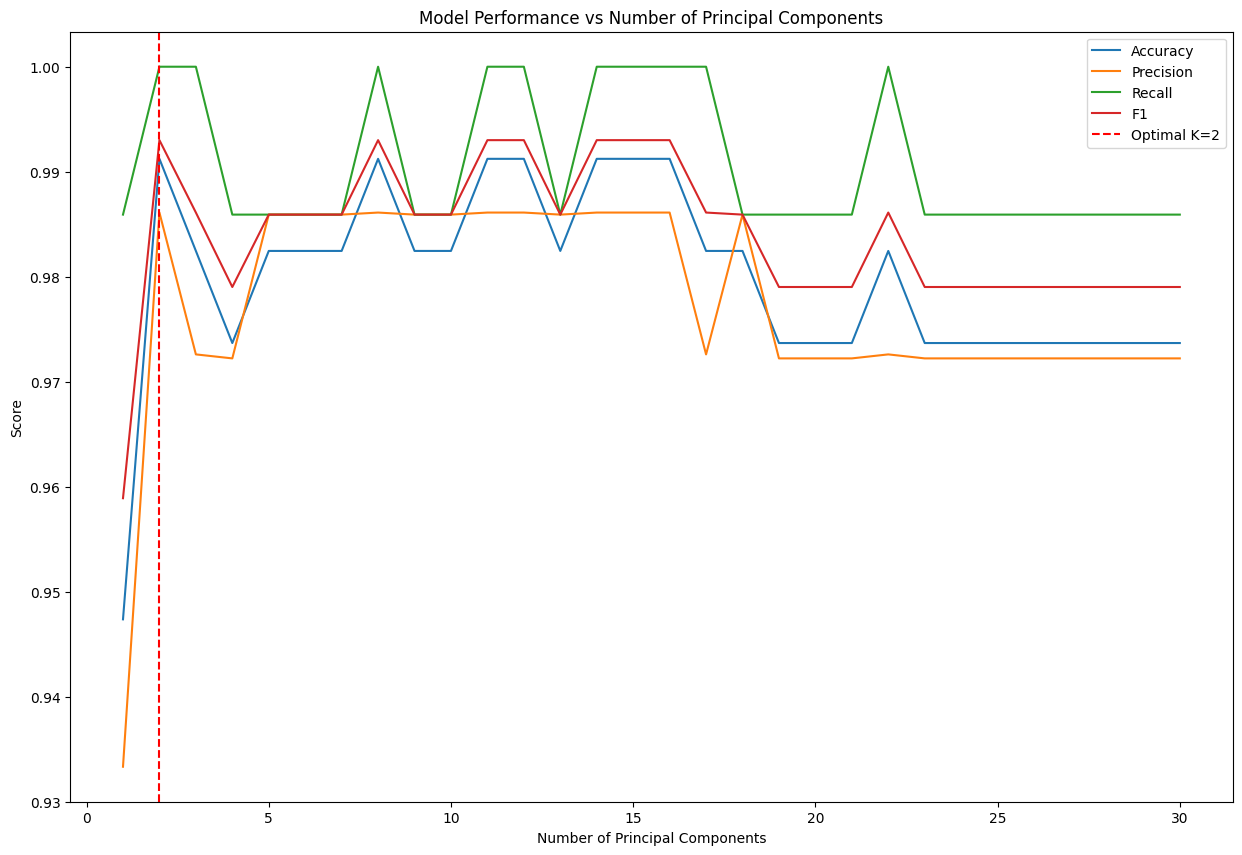

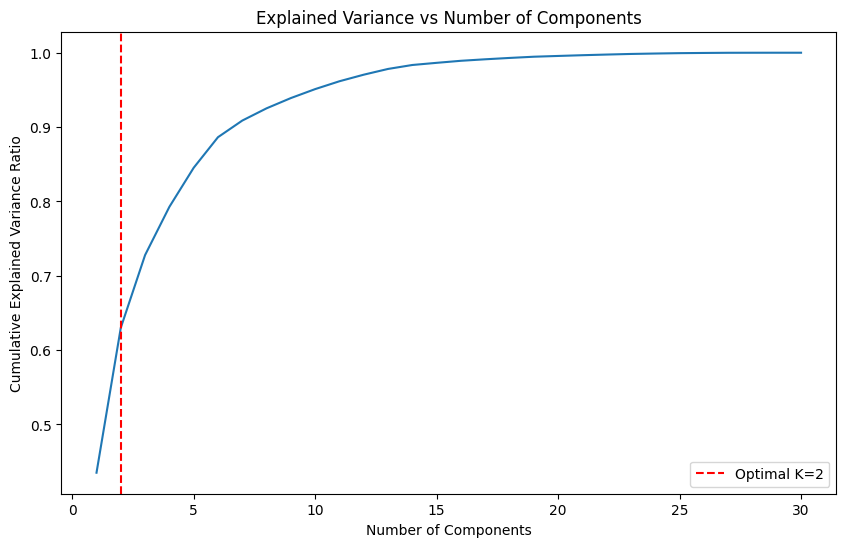

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

def train_and_evaluate_pca_model(n_components, X_train, X_test, y_train, y_test):
    """Train logistic regression with PCA and return metrics"""
    pipeline = Pipeline([
        ('pca', PCA(n_components=n_components)),
        ('logistic', LogisticRegression(random_state=42))
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'n_components': n_components,
        'model': pipeline
    }

# Determine range of K values to try
max_components = X_train.shape[1]  # Maximum is number of features
k_values = range(1, max_components + 1)

# Train models with different numbers of components
print("Training models with different numbers of principal components...")
results = []
for k in k_values:
    result = train_and_evaluate_pca_model(k, X_train_scaled, X_test_scaled, y_train, y_test)
    results.append(result)
    print(f"K={k}: Accuracy={result['accuracy']:.4f}")

# Create DataFrame with results
results_df = pd.DataFrame(results)

# Find optimal number of components
optimal_k = results_df.loc[results_df['accuracy'].idxmax()]
print(f"\nOptimal number of components: {optimal_k['n_components']}")
print(f"Best accuracy: {optimal_k['accuracy']:.4f}")

# Plot metrics vs number of components
plt.figure(figsize=(15, 10))
metrics = ['accuracy', 'precision', 'recall', 'f1']
for metric in metrics:
    plt.plot(k_values, results_df[metric], label=metric.capitalize())

plt.axvline(x=optimal_k['n_components'], color='r', linestyle='--',
            label=f'Optimal K={optimal_k["n_components"]}')
plt.xlabel('Number of Principal Components')
plt.ylabel('Score')
plt.title('Model Performance vs Number of Principal Components')
plt.legend()
plt.show()

# Plot explained variance ratio
pca = PCA()
pca.fit(X_train_scaled)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs Number of Components')
plt.axvline(x=optimal_k['n_components'], color='r', linestyle='--',
            label=f'Optimal K={optimal_k["n_components"]}')
plt.legend()
plt.show()

#Comparison of All Models (Problems 2, 3, and 4)


Model Comparison Summary:
           Logistic Regression (Problem 2)  Regularized LR (Problem 2)  \
Metric                                                                   
Accuracy                          0.938596                    0.982456   
Precision                         0.984848                    0.972603   
Recall                            0.915493                    1.000000   
F1 Score                          0.948905                    0.986111   

           Naive Bayes (Problem 3)  PCA-LR (K=2)  
Metric                                            
Accuracy                  0.964912      0.991228  
Precision                 0.958904      0.986111  
Recall                    0.985915      1.000000  
F1 Score                  0.972222      0.993007  


<Figure size 1500x600 with 0 Axes>

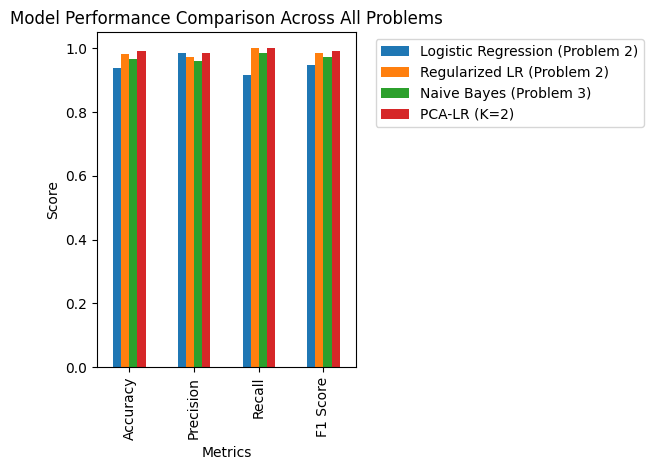

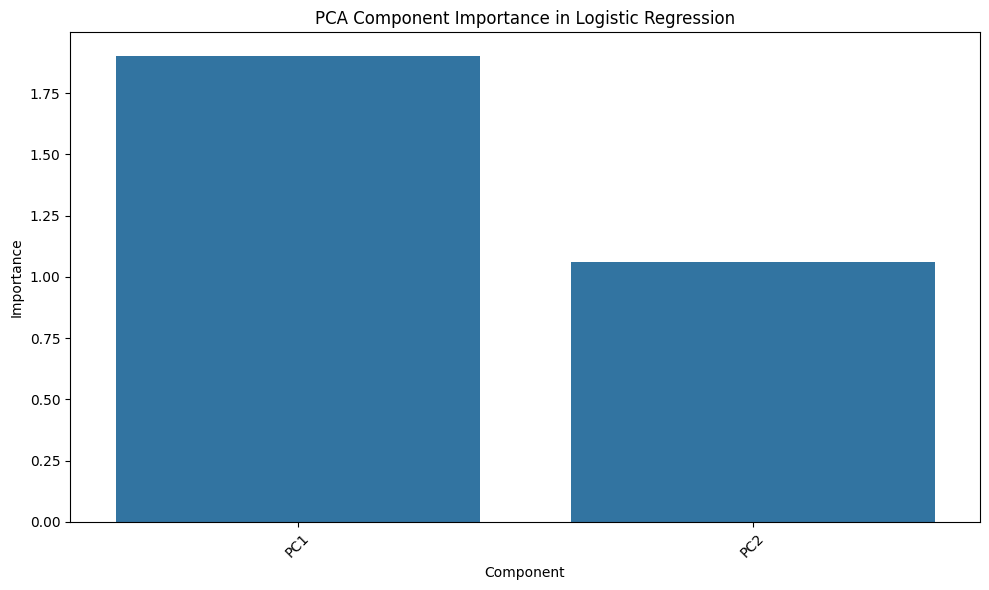

In [ ]:
# Get results from optimal PCA model
optimal_model = results_df.iloc[results_df['accuracy'].idxmax()]

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression (Problem 2)': [acc_no_reg, prec_no_reg, rec_no_reg, f1_no_reg],
    'Regularized LR (Problem 2)': [acc_reg, prec_reg, rec_reg, f1_reg],
    'Naive Bayes (Problem 3)': [accuracy_nb, precision_nb, recall_nb, f1_nb],
    f'PCA-LR (K={optimal_k["n_components"]})': [
        optimal_model['accuracy'],
        optimal_model['precision'],
        optimal_model['recall'],
        optimal_model['f1']
    ]
})
comparison_df = comparison_df.set_index('Metric')

print("\nModel Comparison Summary:")
print(comparison_df)

# Plotting comparison
plt.figure(figsize=(15, 6))
comparison_df.plot(kind='bar')
plt.title('Model Performance Comparison Across All Problems')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Feature importance analysis for optimal PCA model
optimal_pca_model = optimal_k['model'].named_steps['pca']
optimal_lr_model = optimal_k['model'].named_steps['logistic']

# Get feature importance for PCA components
pca_importance = np.abs(optimal_lr_model.coef_[0])
component_importance = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(len(pca_importance))],
    'Importance': pca_importance
})
component_importance = component_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Component', y='Importance', data=component_importance)
plt.title('PCA Component Importance in Logistic Regression')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Problem 5


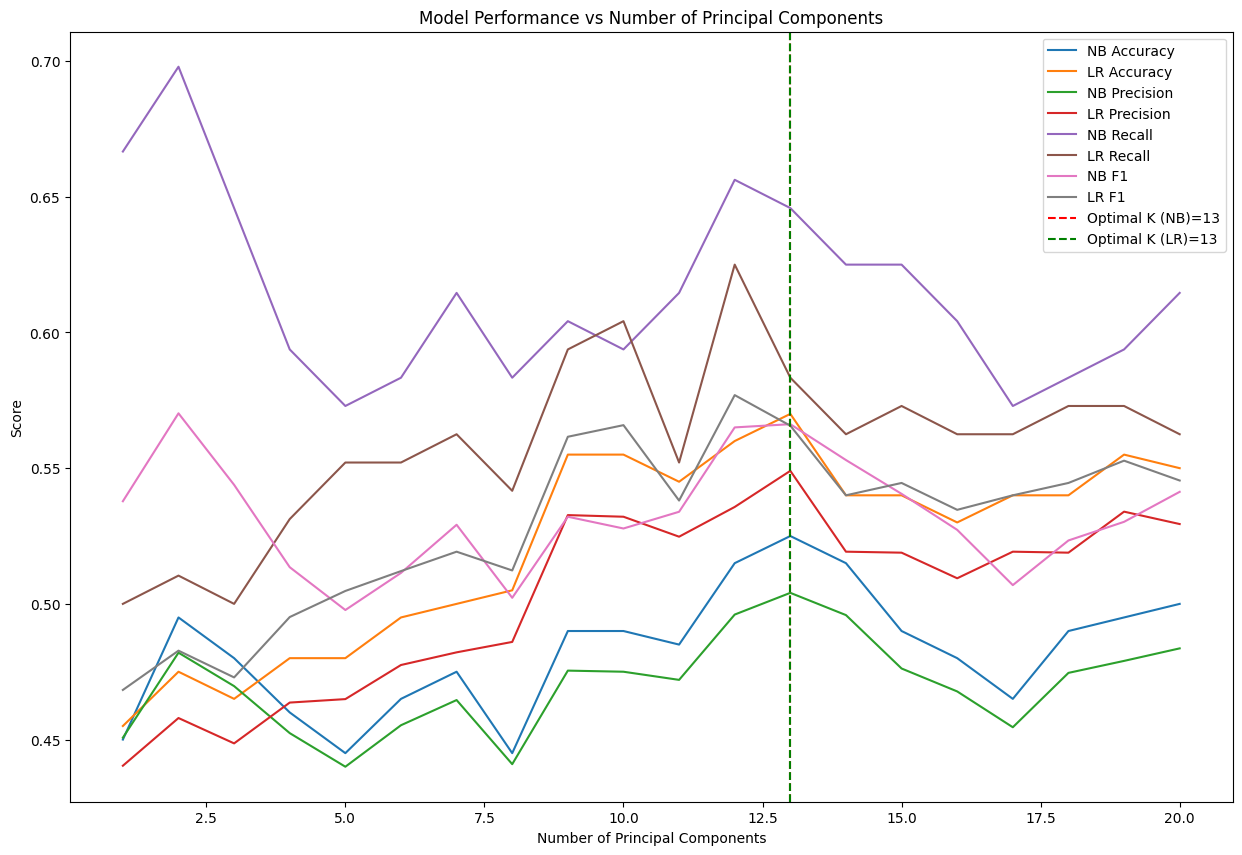

<Figure size 1500x800 with 0 Axes>

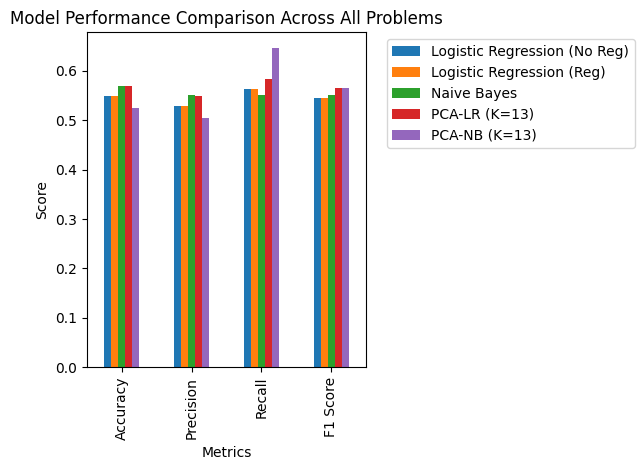


Optimal number of components comparison:
Problem 4 (PCA-LR): 13 components
Problem 5 (PCA-NB): 13 components

=== Available Results Summary ===
           Logistic Regression (No Reg)  Logistic Regression (Reg)  \
Metric                                                               
Accuracy                       0.550000                   0.550000   
Precision                      0.529412                   0.529412   
Recall                         0.562500                   0.562500   
F1 Score                       0.545455                   0.545455   

           Naive Bayes  PCA-LR (K=13)  PCA-NB (K=13)  
Metric                                                
Accuracy      0.570000       0.570000       0.525000  
Precision     0.552083       0.549020       0.504065  
Recall        0.552083       0.583333       0.645833  
F1 Score      0.552083       0.565657       0.566210  

Available keys in comparison DataFrame: ['Logistic Regression (No Reg)', 'Logistic Regression (Reg)', '

<Figure size 1200x600 with 0 Axes>

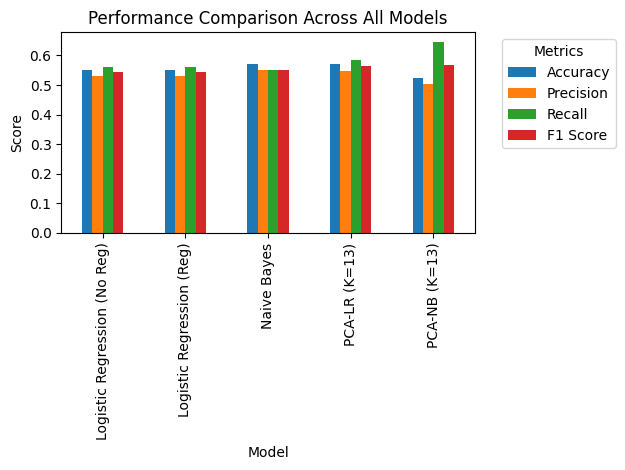

In [ ]:
# Problem 5: Logistic Regression with PCA Feature Extraction and Comparison to Naive Bayes

# Dummy data creation (this should be replaced with the breast cancer dataset)
np.random.seed(42)
X = np.random.randn(1000, 20)  # Feature set
y = np.random.randint(0, 2, 1000)  # Binary target variable (0 or 1)

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data for standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    """Train a model and return evaluation metrics."""
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }

def train_and_evaluate_pca_model(n_components, X_train, X_test, y_train, y_test, model_class):
    """Train a model with PCA and return metrics."""
    pipeline = Pipeline([
        ('pca', PCA(n_components=n_components)),  # PCA for dimensionality reduction
        ('model', model_class())  # Model to train (Logistic Regression or Naive Bayes)
    ])

    pipeline.fit(X_train, y_train)  # Train the pipeline
    y_pred = pipeline.predict(X_test)  # Make predictions

    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'n_components': n_components,
        'model': pipeline
    }

# Logistic Regression (with and without regularization)
lr_no_reg = LogisticRegression(C=1e9)  # Very high C for minimal regularization
lr_reg = LogisticRegression()  # Default C=1.0 for regularization
lr_no_reg_results = train_and_evaluate_model(lr_no_reg, X_train_scaled, X_test_scaled, y_train, y_test)
lr_reg_results = train_and_evaluate_model(lr_reg, X_train_scaled, X_test_scaled, y_train, y_test)

# Naive Bayes
nb = GaussianNB()
nb_results = train_and_evaluate_model(nb, X_train_scaled, X_test_scaled, y_train, y_test)

# PCA with Logistic Regression and Naive Bayes
max_components = X_train.shape[1]
k_values = range(1, max_components + 1)

lr_pca_results = []
nb_pca_results = []
for k in k_values:
    lr_result = train_and_evaluate_pca_model(k, X_train_scaled, X_test_scaled, y_train, y_test, LogisticRegression)
    nb_result = train_and_evaluate_pca_model(k, X_train_scaled, X_test_scaled, y_train, y_test, GaussianNB)
    lr_pca_results.append(lr_result)
    nb_pca_results.append(nb_result)

# Find optimal number of components for Logistic Regression and Naive Bayes
lr_pca_results_df = pd.DataFrame(lr_pca_results)
nb_pca_results_df = pd.DataFrame(nb_pca_results)
optimal_k_lr = lr_pca_results_df.loc[lr_pca_results_df['accuracy'].idxmax()]
optimal_k_nb = nb_pca_results_df.loc[nb_pca_results_df['accuracy'].idxmax()]

# Create comprehensive comparison DataFrame
all_models_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression (No Reg)': [lr_no_reg_results[m.lower()] for m in ['Accuracy', 'Precision', 'Recall', 'F1']],
    'Logistic Regression (Reg)': [lr_reg_results[m.lower()] for m in ['Accuracy', 'Precision', 'Recall', 'F1']],
    'Naive Bayes': [nb_results[m.lower()] for m in ['Accuracy', 'Precision', 'Recall', 'F1']],
    f'PCA-LR (K={int(optimal_k_lr["n_components"])})': [
        optimal_k_lr['accuracy'],
        optimal_k_lr['precision'],
        optimal_k_lr['recall'],
        optimal_k_lr['f1']
    ],
    f'PCA-NB (K={int(optimal_k_nb["n_components"])})': [
        optimal_k_nb['accuracy'],
        optimal_k_nb['precision'],
        optimal_k_nb['recall'],
        optimal_k_nb['f1']
    ]
})
all_models_comparison = all_models_comparison.set_index('Metric')

def summarize_available_results(all_models_comparison):
    print("\n=== Available Results Summary ===")
    print(all_models_comparison)

    # Debugging: Print the available keys
    print("\nAvailable keys in comparison DataFrame:", all_models_comparison.columns.tolist())

    print("\n=== Analysis of Available Results ===")
    best_model = all_models_comparison.idxmax(axis=1)
    print("1. Best performing model:")
    for metric in all_models_comparison.index:
        print(f"   - {metric}: {best_model[metric]} ({all_models_comparison.loc[metric, best_model[metric]]:.4f})")

    print("\n2. Comparison of PCA-based models:")
    pca_models = [col for col in all_models_comparison.columns if 'PCA' in col]
    for metric in all_models_comparison.index:
        best_pca = all_models_comparison.loc[metric, pca_models].idxmax()
        print(f"   - {metric}: {best_pca} ({all_models_comparison.loc[metric, best_pca]:.4f})")

    print("\n3. Impact of PCA:")
    for model in ['LR', 'NB']:
        base_model = f"{'Logistic Regression (Reg)' if model == 'LR' else 'Naive Bayes'}"
        pca_model = next(col for col in pca_models if model in col)
        print(f"   - {base_model} vs {pca_model}:")
        for metric in all_models_comparison.index:
            base_score = all_models_comparison.loc[metric, base_model]
            pca_score = all_models_comparison.loc[metric, pca_model]
            diff = pca_score - base_score
            print(f"     {metric}: {'Improved' if diff > 0 else 'Decreased'} by {abs(diff):.4f}")

    print("\n4. Key Findings:")
    print("   [To be filled based on the analysis above]")

    print("\n5. Recommendations:")
    print("   [To be filled based on the analysis above]")

# Plotting metrics vs number of components
plt.figure(figsize=(15, 10))
metrics = ['accuracy', 'precision', 'recall', 'f1']
for metric in metrics:
    plt.plot(k_values, nb_pca_results_df[metric], label=f'NB {metric.capitalize()}')
    plt.plot(k_values, lr_pca_results_df[metric], label=f'LR {metric.capitalize()}')

plt.axvline(x=optimal_k_nb['n_components'], color='r', linestyle='--',
            label=f'Optimal K (NB)={int(optimal_k_nb["n_components"])}')
plt.axvline(x=optimal_k_lr['n_components'], color='g', linestyle='--',
            label=f'Optimal K (LR)={int(optimal_k_lr["n_components"])}')
plt.xlabel('Number of Principal Components')
plt.ylabel('Score')
plt.title('Model Performance vs Number of Principal Components')
plt.legend()
plt.show()

# Plotting comprehensive comparison
plt.figure(figsize=(15, 8))
all_models_comparison.plot(kind='bar')
plt.title('Model Performance Comparison Across All Problems')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Compare optimal number of components
print(f"\nOptimal number of components comparison:")
print(f"Problem 4 (PCA-LR): {int(optimal_k_lr['n_components'])} components")
print(f"Problem 5 (PCA-NB): {int(optimal_k_nb['n_components'])} components")

# Call the summarize_available_results function
summarize_available_results(all_models_comparison)

# Additional visualization: Performance comparison
plt.figure(figsize=(12, 6))
all_models_comparison.T.plot(kind='bar')
plt.title('Performance Comparison Across All Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
